In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


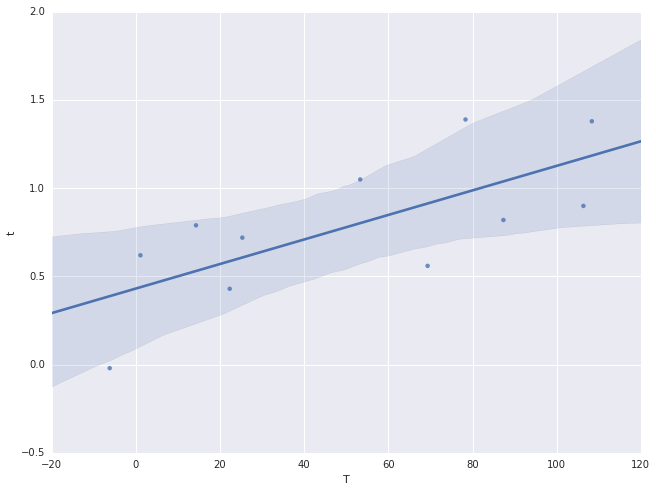

In [187]:
import seaborn as sns
st=60.5
data={'t':df[df['Unnamed: 20']==st]['Exc(U)'], 'T':df[df['Unnamed: 20']==st].ExcEW}
frame = pd.DataFrame(data, columns=['t', 'T'])
sns.lmplot('T', 't', frame,ci=99,size=7,aspect=1.33)

In [176]:
df.sort('ExcEW',inplace=True)

In [177]:
A=df[df['Unnamed: 20']==st].ExcEW.as_matrix()
B=df[df['Unnamed: 20']==st]['Exc(U)'].as_matrix()

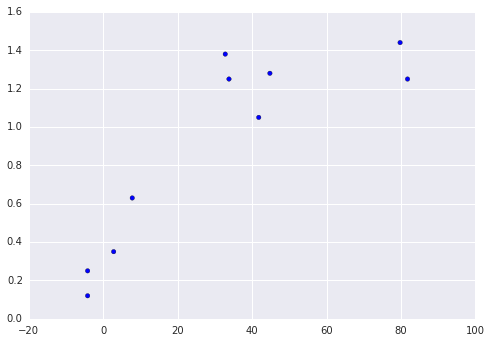

In [178]:
plt.scatter(A,B)

In [180]:
from scipy import stats
#equivalent to Excel TINV(0.05,999)
tcrit=stats.t.ppf(1-0.025, len(A)-2)

In [ ]:
AA=np.vstack((A,np.ones(len(A)))).T



In [181]:
tcrit=stats.t.ppf(1-0.025, len(A)-2)
AA=np.vstack((A,np.ones(len(A)))).T
model=sm.OLS(B,AA)
fit=model.fit()
slope, intercept=fit.params
sterr=np.sqrt(fit.mse_resid)
A0=0
tcrit*sterr*np.sqrt(1./len(A)+(A0-np.mean(A))**2/np.sum((A0-np.mean(A))**2))


In [182]:
import statsmodels.api as sm
model=sm.OLS(B,AA)
fit=model.fit()

In [183]:
slope, intercept=fit.params

In [184]:
sterr=np.sqrt(fit.mse_resid)

In [185]:
A0=0
tcrit*sterr*np.sqrt(1./len(A)+(A0-np.mean(A))**2/np.sum((A0-np.mean(A))**2))

0.67441934993190644

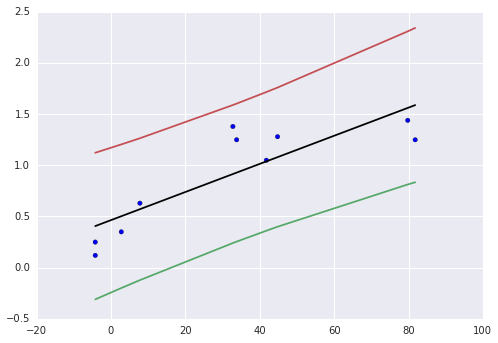

In [186]:
# prediction interval
plt.plot(A,A*slope+intercept,c='k')
plt.scatter(A,B)
plt.plot(A,slope*A+intercept-tcrit*sterr*np.sqrt(1+1./len(A)+(A-np.mean(A))**2/np.sum((A-np.mean(A))**2)))
plt.plot(A,slope*A+intercept+tcrit*sterr*np.sqrt(1+1./len(A)+(A-np.mean(A))**2/np.sum((A-np.mean(A))**2)))

In [2]:
from scipy import stats
import statsmodels.api as sm




In [3]:
df2=pd.read_csv("datosestrellas/barrado.csv")

In [4]:
df1=pd.read_csv("datosestrellas/mandk.csv")

In [5]:
df1.head()

,#HBC,name,Vmag,B-V,U-B,U-V,(U-V)KH,ExcU,vsini,Sp,...,EWHaBa,ExcEW,ExcExp,type,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,326,MacCsH15,13.85,1.77,0.92,2.69,3.03,0.34,NaN,K1,...,0.95,14.05,11.1,tt,0,12,30.38,65,33,5.5
1,4,MacCH10,14.72,1.51,0.52,2.03,2.78,0.75,NaN,K4,...,1.76,22.24,19.6,tt,0,12,54.89,65,34,9.9
2,5,MacCH9,14.96,1.28,0.72,2.00,2.45,0.45,NaN,K4,...,1.76,46.24,43.6,tt,0,13,29.21,65,36,0.2
3,10,LkH@264,12.46,0.83,-0.46,0.37,1.33,0.96,NaN,K5,...,2.16,82.84,79.9,tt,2,56,37.49,20,5,37.1
4,11,LkH@325,13.43,1.28,0.92,2.20,2.45,0.25,NaN,K7,...,3.26,4.44,1.1,tt,3,28,52.13,30,45,4.6


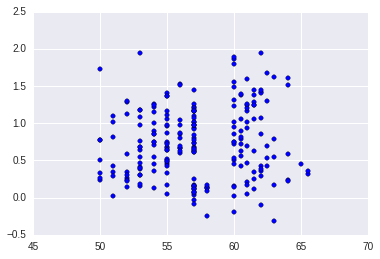

In [6]:
plt.scatter(df1.SpT,df1.ExcU)

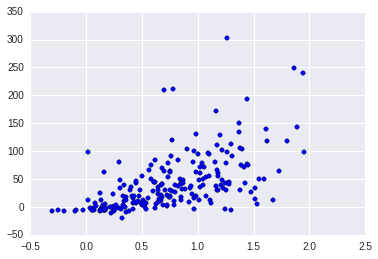

In [7]:
plt.scatter(df1.ExcU,df1.ExcExp)

(array([ 14.,  28.,  15.,  37.,  43.,   6.,  30.,  33.,  10.,   8.]),
 array([ 50.  ,  51.55,  53.1 ,  54.65,  56.2 ,  57.75,  59.3 ,  60.85,
         62.4 ,  63.95,  65.5 ]),
 <a list of 10 Patch objects>)

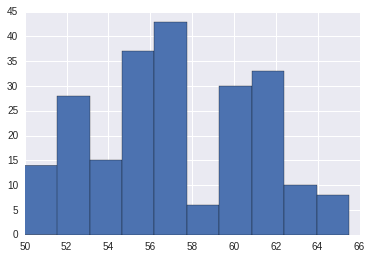

In [8]:
plt.hist(df1.SpT)

In [9]:
listspt=np.unique(np.around(df1.SpT,0))
listspt

array([ 50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  60.,  61.,
        62.,  63.,  64.,  65.,  66.])

In [10]:
filter=np.around(df1.SpT,0)==listspt[0]

In [11]:
szsp=np.sqrt(len(listspt))
np.mod(szsp,4)

0.0

(2.119623596296583, 0.90837447186286036)
(1.489889538561056, 0.96016333182342528)
(2.0188768028051851, 0.991165562083962)
(1.9243117094560394, 0.99999743560493215)
(1.811196962810272, 0.99995489229575163)
(1.9154956134400347, 0.99999999948503693)
(1.032850593825305, 0.99994062825491536)
(8.4163321774139277, 0.99999999541633111)
(2.6482485921782857, 0.75402148630345955)
(5.5855842849671031, 0.99999934700947268)
(2.9448345942008234, 0.99143499934132184)
(5.0074529427896133, 0.9999943833502476)
(2.0437887808496562, 0.7277050227364249)
(1.4522203932041189, 0.83506997027765839)
(2.7391003653507345e-32, nan)
(7.2757353454628887e-32, 0.99999999999999978)


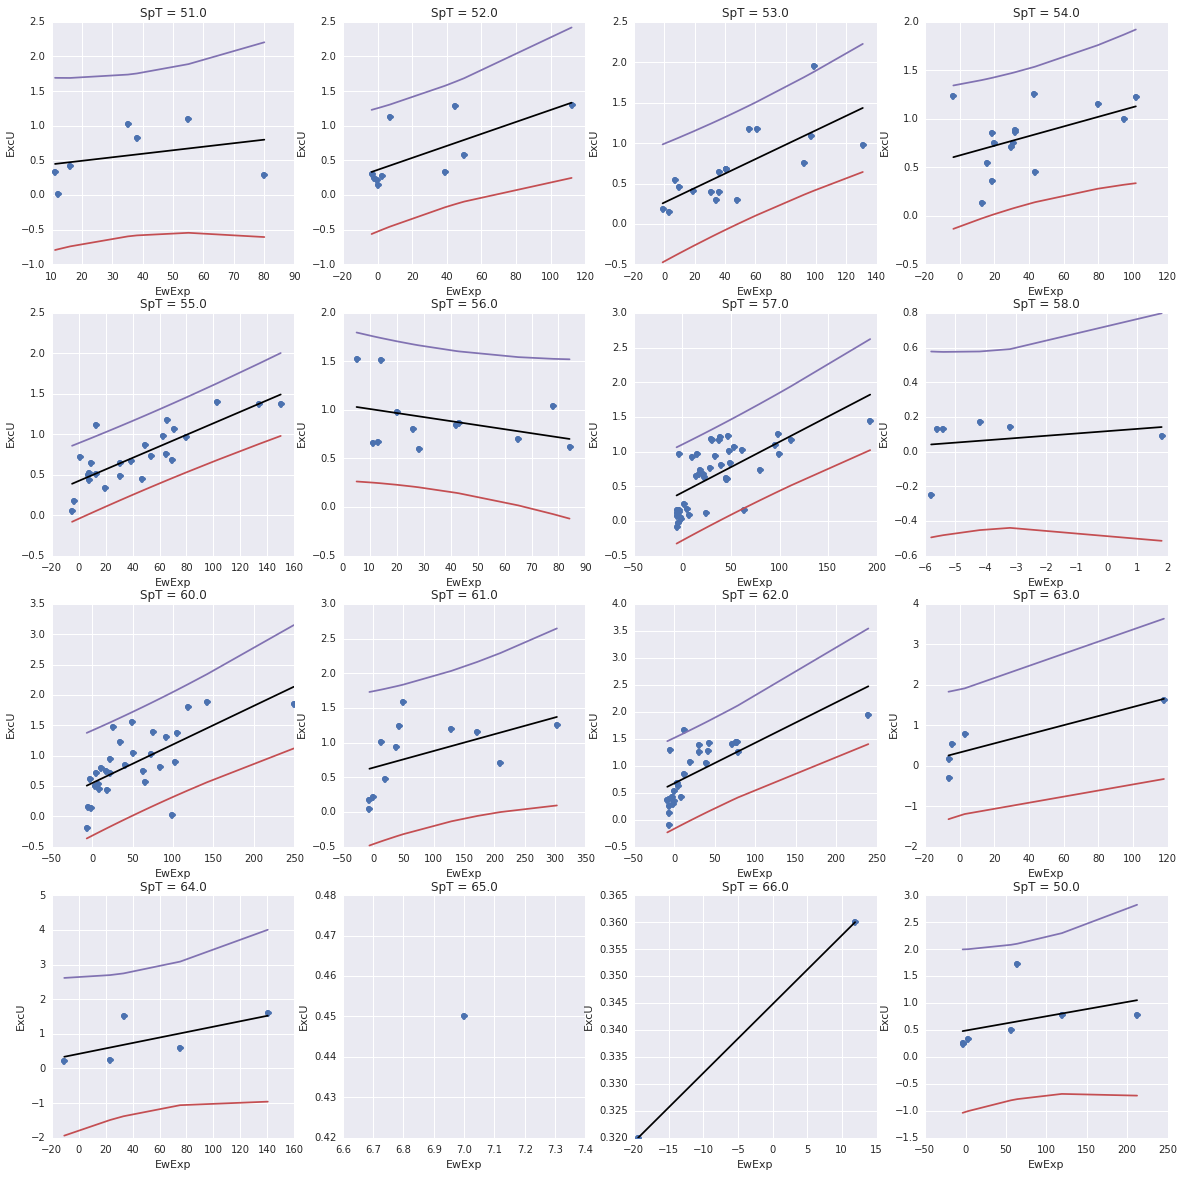

In [14]:
NUM_COLORS = len(listspt)

cm = plt.get_cmap('gist_rainbow')
fig = plt.figure(figsize=(20,20))
#ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
predbands=1.
for i in range(NUM_COLORS):
    ax = fig.add_subplot(4,4,i)
    filter=np.around(df1.SpT,0)==listspt[i]
    B=df1.ExcU[filter]
    A=df1.ExcExp[filter]
    A,B=(list(A) for A in zip(*sorted(zip(A, B))))
    A,B=np.asarray(A),np.asarray(B)
    tcrit=stats.t.ppf(1-0.025, len(A)-2)
    AA=np.vstack((A,np.ones(len(A)))).T
    model=sm.OLS(B,AA)
    fit=model.fit()
    slope, intercept=fit.params
    sterr=np.sqrt(fit.mse_resid)
    A0=0
    tcrit*sterr*np.sqrt(1./len(A)+(A0-np.mean(A))**2/np.sum((A0-np.mean(A))**2))
    ax.plot(A,B,'o')
    ax.plot(A,A*slope+intercept,c='k')
    ax.plot(A,slope*A+intercept-tcrit*sterr*np.sqrt(1*predbands+1./len(A)+(A-np.mean(A))**2/np.sum((A-np.mean(A))**2)))
    ax.plot(A,slope*A+intercept+tcrit*sterr*np.sqrt(1*predbands+1./len(A)+(A-np.mean(A))**2/np.sum((A-np.mean(A))**2)))
    print stats.chisquare(f_obs=B, f_exp=slope*A+intercept)
    ax.set_title("SpT = %.1f"%listspt[i])
    ax.set_xlabel("EwExp")
    ax.set_ylabel("ExcU")
plt.show()

Power_divergenceResult(statistic=3.6861517797562531, pvalue=0.9940947841103146)
Power_divergenceResult(statistic=4.2257998450555707, pvalue=0.99999985127118785)
Power_divergenceResult(statistic=4.2358368799447135, pvalue=0.99999999999943812)
Power_divergenceResult(statistic=11.881001617589961, pvalue=0.99999999976076093)
Power_divergenceResult(statistic=8.3890594849011588, pvalue=0.99999897793447379)
Power_divergenceResult(statistic=9.2795587865732418, pvalue=0.99999994898446776)
Power_divergenceResult(statistic=6.9675748913144666, pvalue=0.99999596278308522)
Power_divergenceResult(statistic=1.4620433520508231, pvalue=0.91740799927920813)


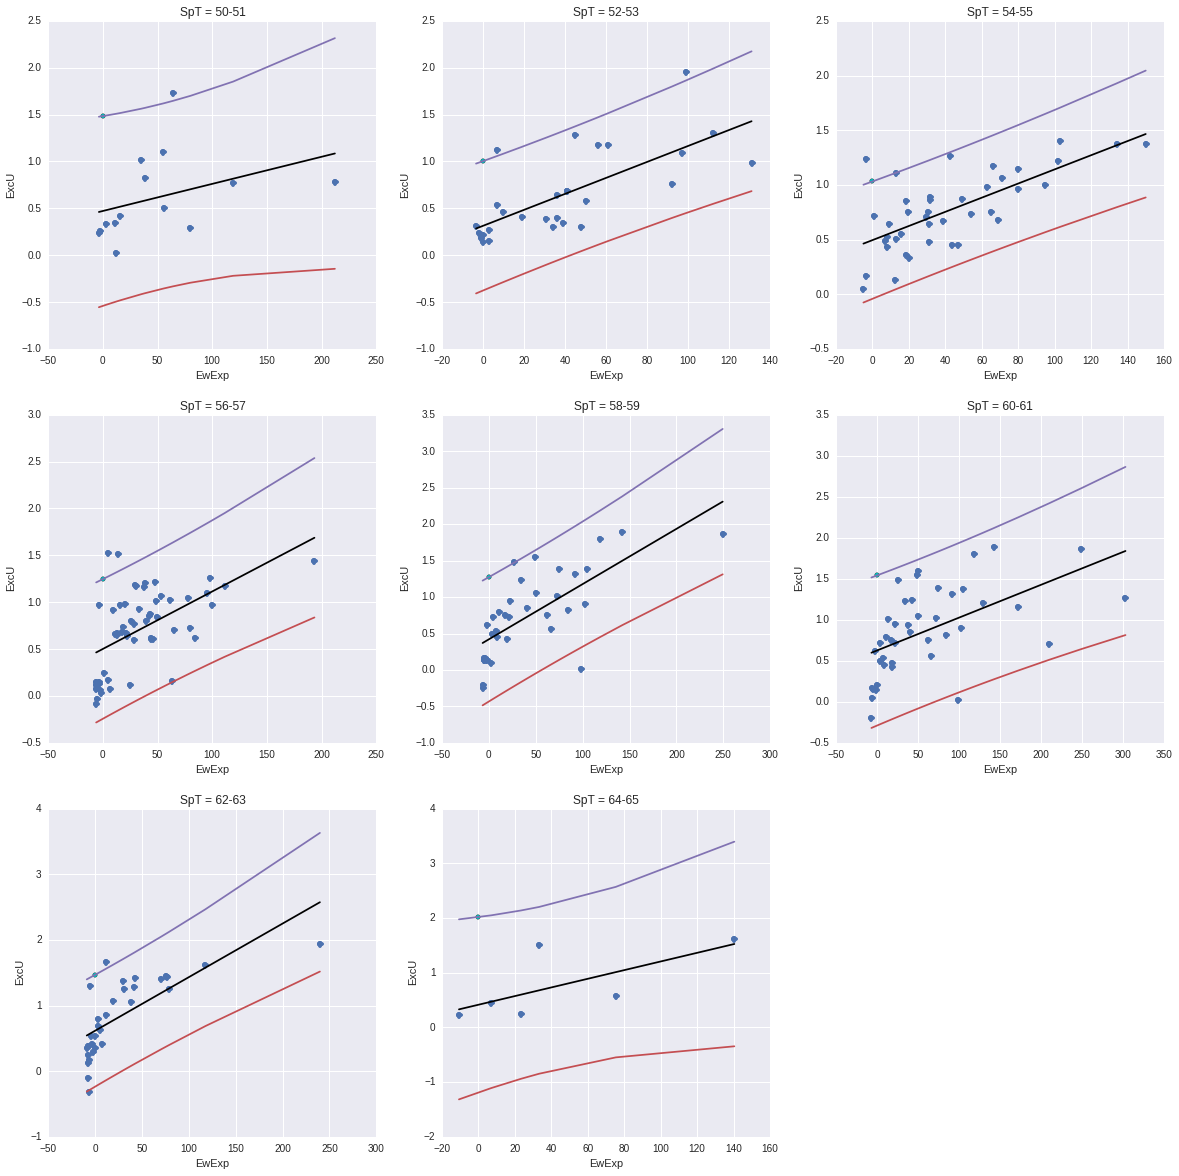

In [12]:
NUM_COLORS = len(listspt)

cm = plt.get_cmap('gist_rainbow')
fig = plt.figure(figsize=(20,20))
#ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
predbands=1.
k=1
bandls=[]
icls=[]
sptls=[]
for i in range(NUM_COLORS-1):
    if np.mod(listspt[i],2)==0 :
        ax = fig.add_subplot(3,3,k)
        k=k+1
        try:
            filter=(np.around(df1.SpT,0)==listspt[i])|((np.around(df1.SpT,0)==listspt[i+1]))
        except:
            continue
        B=df1.ExcU[filter]
        A=df1.ExcExp[filter]
        A,B=(list(A) for A in zip(*sorted(zip(A, B))))
        A,B=np.asarray(A),np.asarray(B)
        tcrit=stats.t.ppf(1-0.025, len(A)-2)
        AA=np.vstack((A,np.ones(len(A)))).T
        model=sm.OLS(B,AA)
        fit=model.fit()
        slope, intercept=fit.params
        sterr=np.sqrt(fit.mse_resid)
        A0=0
        tcrit*sterr*np.sqrt(1./len(A)+(A0-np.mean(A))**2/np.sum((A0-np.mean(A))**2))
        ax.plot(A,B,'o')
        ax.plot(A,A*slope+intercept,c='k')
        band=tcrit*sterr*np.sqrt(1*predbands+1./len(A)+(A-np.mean(A))**2/np.sum((A-np.mean(A))**2))
        band0=tcrit*sterr*np.sqrt(1*predbands+1./len(A)+(0-np.mean(A))**2/np.sum((A-np.mean(A))**2))
        bandls.append(band0)
        plt.scatter(0,intercept+band0,c='c')
        icls.append(intercept)
        sptls.append(listspt[i])
        ax.plot(A,slope*A+intercept-band)
        ax.plot(A,slope*A+intercept+band)
        print stats.chisquare(f_obs=B, f_exp=slope*A+intercept)
        ax.set_title("SpT = %i-%i"%(listspt[i],listspt[i]+1))
        ax.set_xlabel("EwExp")
        ax.set_ylabel("ExcU")
plt.show()
bandls=np.asarray(bandls)
icls=np.asarray(icls)
sptls=np.asarray(sptls)

/usr/local/lib/python2.7/dist-packages/numpy/lib/arraysetops.py:198: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


<function matplotlib.pyplot.show>

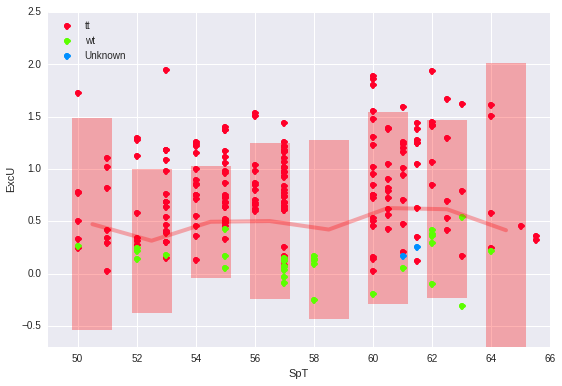

In [13]:
fig=plt.figure(figsize=(9,6))
#plt.scatter(df1.SpT,df1.ExcU)
NUM=3
ax = fig.add_subplot(111)
ax.set_color_cycle([cm(1.*i/NUM) for i in range(NUM)])
for i in np.unique(df1.type)[1:]:
    filter=df1.type==i
    ax.plot(df1.SpT[filter],df1.ExcU[filter],'o',label=i)
filter2=df1.type.isnull()
ax.plot(df1.SpT[filter2],df1.ExcU[filter2],'o',label="Unknown")
plt.errorbar(sptls+.5,icls,bandls,c='r',capsize=0,elinewidth=40,alpha=0.3,linewidth=4)
plt.xlabel("SpT")
plt.ylabel("ExcU")
plt.legend(loc=2)
plt.xlim(49,66)
plt.ylim(-0.7)
plt.show

In [14]:
np.unique(df1.type)

array([nan, 'tt', 'wt'], dtype=object)

In [15]:
(df1.type==np.unique(df1.type)[0]).sum()

0

In [16]:
df1.type.isnull().sum()

2

In [17]:
dfos=pd.read_csv("datosestrellas/ownsample.csv")
dfos.head()

,ID,Group,RAC,DEC,ST,V,U-B,E(U-B),B-V,E(B-V),...,d,vsini,Lx/Lbol,ExcU,U-V,E(U-V),StP,V-R,E(V-R),E(U)
0,MML36,UCL,133757.2959,-413441.826,K0IV,10.118,0.509,0.077,0.865,0.021,...,97.75,13.6,-3.2,0.066,1.374,0.079,50,0.4970,0.0170,0.088397
1,HIP66941,UCL,13438.6939,-69739.468,G5IV,7.597,0.233,0.063,0.717,0.020,...,124.22,215.0,-3.5,0.275,0.950,0.066,45,0.4065,0.0205,0.071784
2,MML38,UCL,134750.5514,-4925.521,G9IVe,10.892,0.388,0.095,0.846,0.022,...,148.14,67.0,-3.2,0.206,1.234,0.097,49,0.4810,0.0160,0.109133
3,HIP67522,UCL,13506.2795,-40508.886,G9IVe,9.801,0.142,0.037,0.653,0.013,...,125.94,51.0,-3.5,0.065,0.795,0.039,49,0.3730,0.0090,0.054608
4,MML39,UCL,135247.7974,-46449.214,F8V,9.591,0.092,0.091,0.591,0.018,...,144.55,25.9,-3.3,0.000,0.683,0.092,38,0.3680,0.0140,0.103990


In [18]:
dfosn=dfos[np.in1d(dfos.StP,df2.SpT)]

In [19]:
exar=np.array([])
for j in range(len(dfosn)):
    exar=np.append(exar,dfosn.Ha.iloc[j]-df2.EWHa[df2.SpT==dfosn.StP.iloc[j]])
#    print j,dfos.Ha.iloc[j],df2.EWHa[df2.SpT==dfos.StP.iloc[j]],dfos.StP.iloc[j]

In [22]:
dfosn['ExcExp']=exar
# do not mind the warning: http://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Power_divergenceResult(statistic=8.9187758725464157, pvalue=0.99993326306328945)
Power_divergenceResult(statistic=4.7907488775389897, pvalue=0.99999999776091875)
Power_divergenceResult(statistic=4.2358368799447135, pvalue=0.99999999999943812)
Power_divergenceResult(statistic=11.881001617589961, pvalue=0.99999999976076093)
Power_divergenceResult(statistic=8.3890594849011588, pvalue=0.99999897793447379)
Power_divergenceResult(statistic=9.2795587865732418, pvalue=0.99999994898446776)
Power_divergenceResult(statistic=6.9675748913144666, pvalue=0.99999596278308522)
Power_divergenceResult(statistic=1.4620433520508231, pvalue=0.91740799927920813)


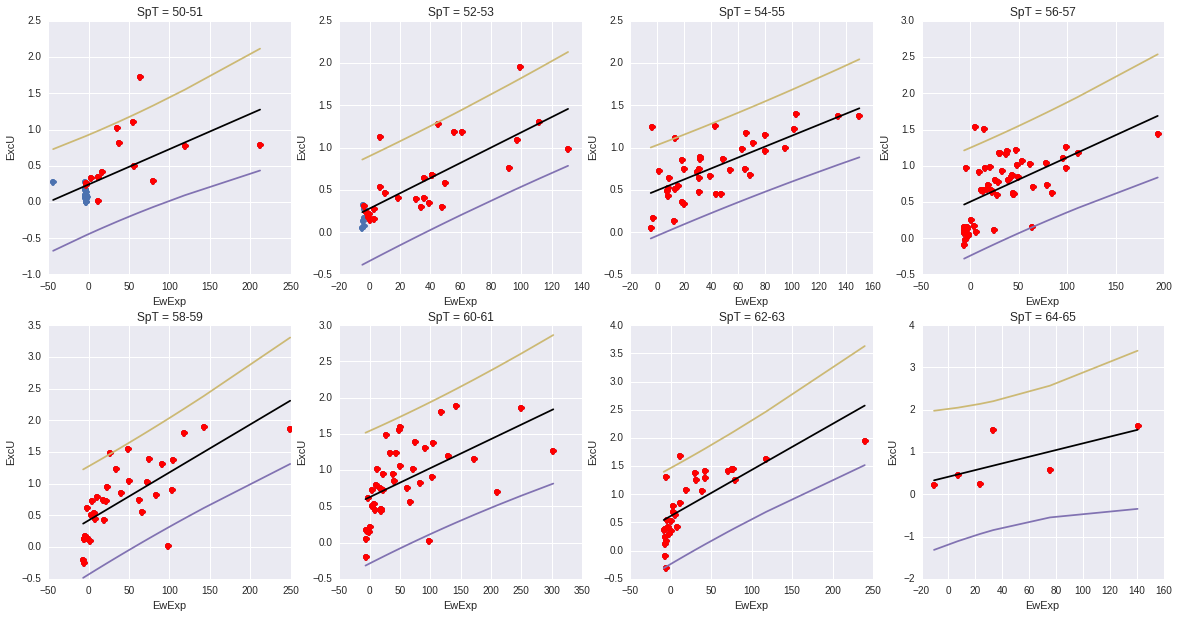

In [34]:
NUM_COLORS = len(listspt)

cm = plt.get_cmap('gist_rainbow')
fig = plt.figure(figsize=(20,10))
#ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
predbands=1.
k=1
bandls=[]
icls=[]
sptls=[]
for i in range(NUM_COLORS-1):
    if np.mod(listspt[i],2)==0 :
        ax = fig.add_subplot(2,4,k)
        k=k+1
        try:
            filter=(np.around(df1.SpT,0)==listspt[i])|((np.around(df1.SpT,0)==listspt[i+1]))
        except:
            continue
        B1=df1.ExcU[filter]
        A1=df1.ExcExp[filter]
        filtos=(np.around(dfosn.StP,0)==listspt[i])|((np.around(dfosn.StP,0)==listspt[i+1]))
        A=np.append(A1,dfosn.ExcExp[filtos])
        B=np.append(B1,dfosn.ExcU[filtos])
        A,B=(list(A) for A in zip(*sorted(zip(A, B))))
        A,B=np.asarray(A),np.asarray(B)
        tcrit=stats.t.ppf(1-0.025, len(A)-2)
        AA=np.vstack((A,np.ones(len(A)))).T
        model=sm.OLS(B,AA)
        fit=model.fit()
        slope, intercept=fit.params
        sterr=np.sqrt(fit.mse_resid)
        A0=0
        tcrit*sterr*np.sqrt(1./len(A)+(A0-np.mean(A))**2/np.sum((A0-np.mean(A))**2))
        ax.plot(A,B,'o')
        ax.plot(A1,B1,'o',c='r')
        ax.plot(A,A*slope+intercept,c='k')
        band=tcrit*sterr*np.sqrt(1*predbands+1./len(A)+(A-np.mean(A))**2/np.sum((A-np.mean(A))**2))
        band0=tcrit*sterr*np.sqrt(1*predbands+1./len(A)+(0-np.mean(A))**2/np.sum((A-np.mean(A))**2))
        bandls.append(band0)
#        plt.scatter(0,intercept+band0,c='c')
        icls.append(intercept)
        sptls.append(listspt[i])
        ax.plot(A,slope*A+intercept-band)
        ax.plot(A,slope*A+intercept+band)
        print stats.chisquare(f_obs=B, f_exp=slope*A+intercept)
        ax.set_title("SpT = %i-%i"%(listspt[i],listspt[i]+1))
        ax.set_xlabel("EwExp")
        ax.set_ylabel("ExcU")
plt.show()
bandls=np.asarray(bandls)
icls=np.asarray(icls)
sptls=np.asarray(sptls)

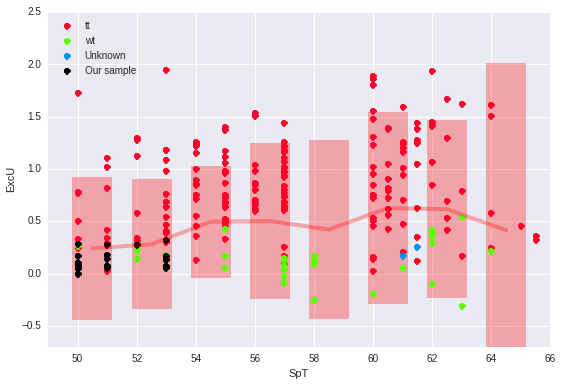

In [31]:
fig=plt.figure(figsize=(9,6))
#plt.scatter(df1.SpT,df1.ExcU)
NUM=3
ax = fig.add_subplot(111)
ax.set_color_cycle([cm(1.*i/NUM) for i in range(NUM)])
for i in np.unique(df1.type)[1:]:
    filter=df1.type==i
    ax.plot(df1.SpT[filter],df1.ExcU[filter],'o',label=i)
filter2=df1.type.isnull()
ax.plot(df1.SpT[filter2],df1.ExcU[filter2],'o',label="Unknown")
plt.plot(dfosn.StP,dfosn.ExcU,'o',label="Our sample",c='k')
plt.errorbar(sptls+.5,icls,bandls,c='r',capsize=0,elinewidth=40,alpha=0.3,linewidth=4)
plt.xlabel("SpT")
plt.ylabel("ExcU")
plt.legend(loc=2)
plt.xlim(49,66)
plt.ylim(-0.7)
plt.show()

http://www.real-statistics.com/regression/confidence-and-prediction-intervals/

In [51]:
x=dfos['U-V']
y=dfos['E(U-V)']

In [35]:
x.min()

0.68299999999999994

In [36]:
x.max()

1.8759999999999999

In [39]:
df1['U-V'].min()

-0.53000000000000003

In [40]:
df1['U-V'].max()

3.7400000000000002

In [48]:
print df1[' Vmag'].min(),df1[' Vmag'].max()

9.9 16.34


In [49]:
print dfos.V.min(),dfos.V.max()

7.597 11.332


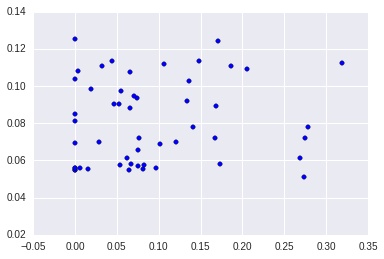

In [50]:
plt.scatter(dfos.ExcU,dfos['E(U)'])

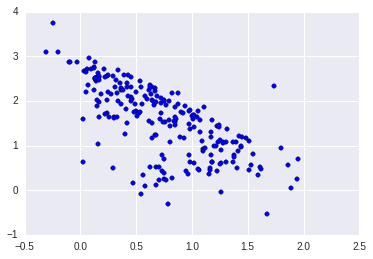

In [52]:
plt.scatter(df1.ExcU,df1['U-V'])

In [42]:
df1.columns

Index([u'#HBC', u'name', u' Vmag', u'B-V', u'U-B', u'U-V', u'(U-V)KH', u'ExcU',
       u'vsini', u'Sp', u'SpT', u'EW', u'EWHaBa  ', u'ExcEW', u'ExcExp',
       u'type', u'Unnamed: 16', u'Unnamed: 17', u'Unnamed: 18', u'Unnamed: 19',
       u'Unnamed: 20', u'Unnamed: 21'],
      dtype='object')

In [43]:
dfos.columns

Index([u'ID', u'Group', u'RAC', u'DEC', u'ST', u'V', u'U-B', u'E(U-B)', u'B-V',
       u'E(B-V)', u'V-I', u'R-I', u'Ha', u'HaBA', u'd', u'vsini', u'Lx/Lbol',
       u'ExcU', u'U-V', u'E(U-V)', u'StP', u'V-R', u'E(V-R)', u'E(U)'],
      dtype='object')

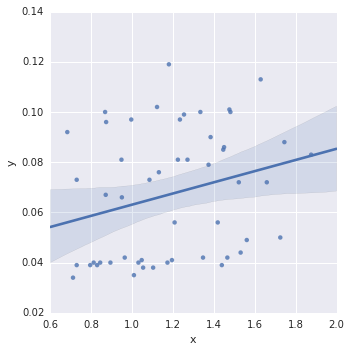

In [21]:
dfer=pd.DataFrame({'x' : x, 'y': y})
sns.lmplot(x="x", y="y", data=dfer)

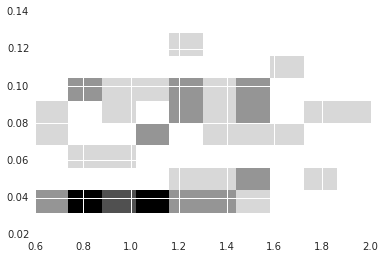

In [438]:
myrange=np.array([(.6,2),(0.02,0.14)])
a=plt.hist2d(x,y,bins=10,range=myrange)

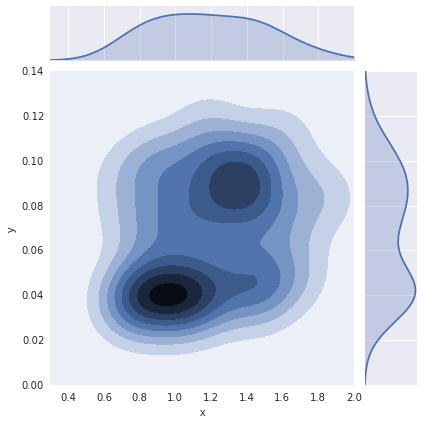

In [439]:
ax=sns.jointplot(x="x", y="y", data=dfer,kind="kde",stat_func=None,xlim=(0.3,2),ylim=(0,0.14))

(0.5, 2)

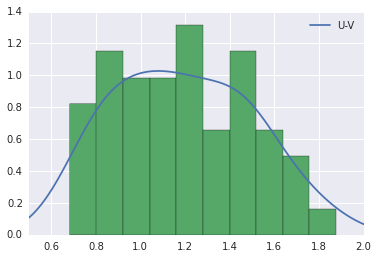

In [440]:
sns.kdeplot(x)
plt.hist(x,normed=True)
plt.xlim(0.5,2)

In [441]:
from sklearn.neighbors import KernelDensity


def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [451]:
x_grid=np.around(np.arange(x.min(),x.max(),0.01),2)
y_grid=np.linspace(y.min(),y.max(),len(x_grid))

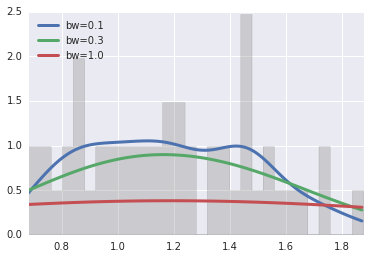

In [454]:
fig, ax = plt.subplots()
for bandwidth in [0.1, 0.3, 1.0]:
    ax.plot(x_grid, kde_sklearn(x, x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, normed=True)
ax.set_xlim(x.min(), x.max())
ax.legend(loc='upper left')

In [455]:


from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print grid.best_params_



{'bandwidth': 0.1310344827586207}


(0.68299999999999994, 1.8759999999999999)

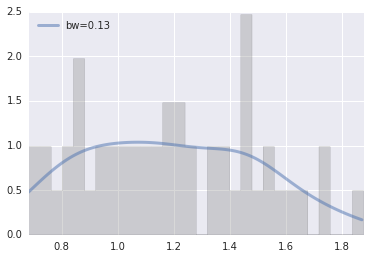

In [456]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, normed=True)
ax.legend(loc='upper left')
ax.set_xlim(x.min(), x.max())


{'bandwidth': 0.01}


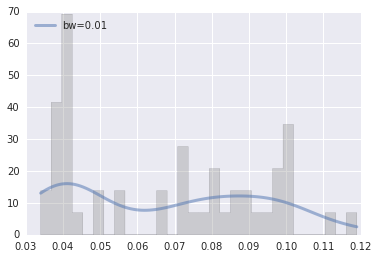

In [457]:


from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.01, 0.05, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(y[:, None])
print grid.best_params_
kde = grid.best_estimator_
pdfy = np.exp(kde.score_samples(y_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(y_grid, pdfy, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(y, 30, fc='gray', histtype='stepfilled', alpha=0.3, normed=True)
ax.legend(loc='upper left')

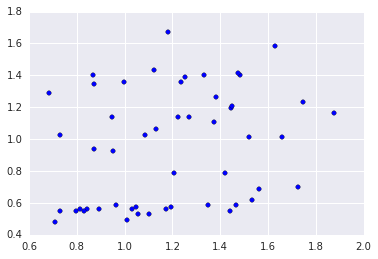

In [458]:
plt.scatter(x,y*(x.max()-x.min())/(y.max()-y.min()))

In [459]:
conv=(x.max()-x.min())/(y.max()-y.min())
y=y*conv
y_grid=y_grid*conv

In [460]:


from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.01,0.2, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(np.vstack([x,y]).T)
print grid.best_params_


{'bandwidth': 0.12793103448275864}


In [461]:
X, Y = np.meshgrid(x_grid, y_grid)

xy = np.vstack([X.ravel(), Y.ravel()]).T

In [462]:
kde2d = grid.best_estimator_
pdf2d = np.exp(kde2d.score_samples(xy)).reshape(X.shape)


<matplotlib.contour.QuadContourSet instance at 0x7f76d3448c68>

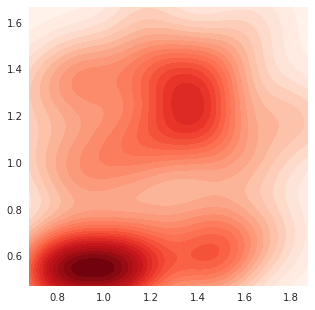

In [463]:
plt.figure(figsize=(5,5))
levels = np.linspace(0, pdf2d.max(), 25)
plt.contourf(X, Y, pdf2d, levels=levels, cmap=plt.cm.Reds)

<matplotlib.contour.QuadContourSet instance at 0x7f76d35b2998>

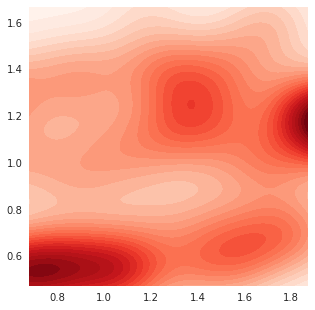

In [464]:
plt.figure(figsize=(5,5))
levels = np.linspace(0, (pdf2d/pdf).max(), 25)
plt.contourf(X, Y, pdf2d/pdf, levels=levels, cmap=plt.cm.Reds)

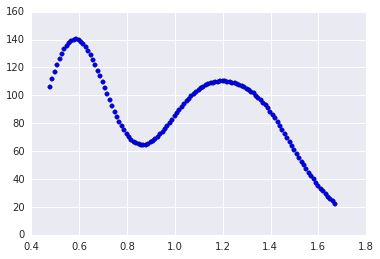

In [465]:
plt.scatter(y_grid,(pdf2d/pdf).sum(axis=1))
# bayes

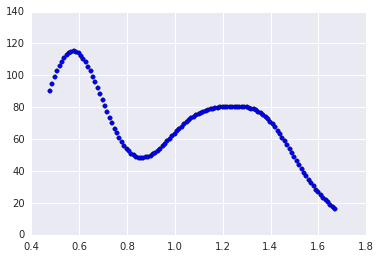

In [466]:
plt.scatter(y_grid,(pdf2d).sum(axis=1))
# no bayes

In [467]:
mypdf=(pdf2d/pdf).sum(axis=1)

In [468]:
kk=0
for i in np.arange(len(df1)):
    if x.min()<np.sort(df1['U-V'])[i]<x.max() :
        kk=kk+1
print 100*kk/len(df1)

40


(array([ 1417.,  1374.,   924.,   803.,  1009.,  1205.,  1205.,  1033.,
          681.,   349.]),
 array([ 0.034 ,  0.0425,  0.051 ,  0.0595,  0.068 ,  0.0765,  0.085 ,
         0.0935,  0.102 ,  0.1105,  0.119 ]),
 <a list of 10 Patch objects>)

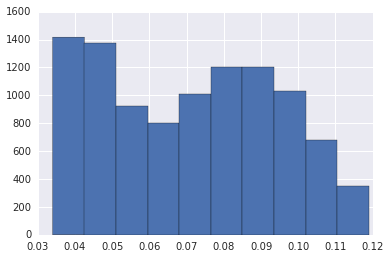

In [469]:
draws=[]
for i in range(10000):
    draws.append(np.random.choice(y_grid, p=mypdf/mypdf.sum()))
draws=np.asarray(draws)/conv
plt.hist(draws)

In [536]:
filter=(x_grid==df1['U-V'].iloc[8])
df1['U-V'].iloc[8]

1.3799999999999999

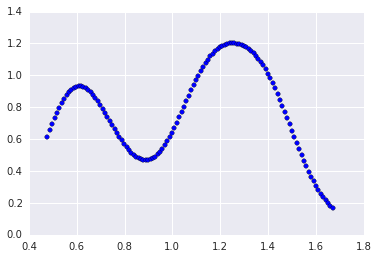

In [537]:
plt.scatter(y_grid,(pdf2d/pdf).T[filter])

(array([ 30.,  27.,  17.,  15.,  26.,  27.,  26.,  32.,  14.,  10.]),
 array([ 0.034 ,  0.0425,  0.051 ,  0.0595,  0.068 ,  0.0765,  0.085 ,
         0.0935,  0.102 ,  0.1105,  0.119 ]),
 <a list of 10 Patch objects>)

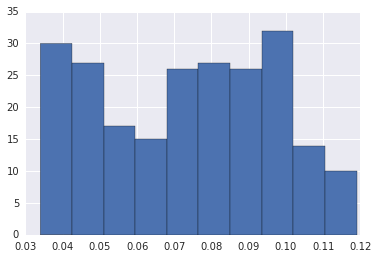

In [569]:
errUV=[]
for i in range(len(df1)):
    UVval=df1['U-V'].iloc[i]
    filter=(x_grid==UVval)
    if filter.sum()>0:
        pro=(pdf2d/pdf).T[filter][0]
    if filter.sum()==0:
        pro=mypdf
    errUV.append(np.random.choice(y_grid, p=pro/pro.sum())/conv)
errUV=np.asarray(errUV)
plt.hist(errUV)

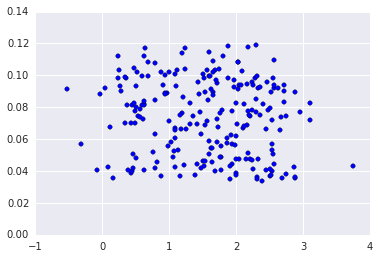

In [570]:
plt.scatter(df1['U-V'],errUV)

In [590]:
def lnlike(theta, x, y, yerr):
    m, b = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2)
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(2*np.pi*inv_sigma2)))
def lnprior(theta):
    m, b = theta
    if -100 < m < 100 and -10.0 < b < 10.0:
        return 0.0
    return -np.inf
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [591]:
import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [1, 1], args=(df1.ExcU,df1.ExcExp, errUV))
m_ml, b_ml = result["x"]

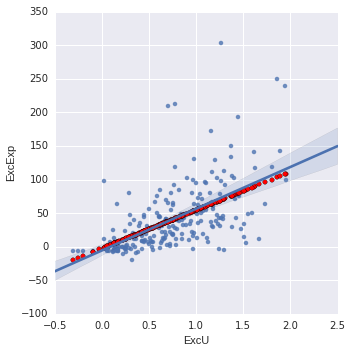

In [592]:
sns.lmplot(x='ExcU',y='ExcExp',data=df1)
plt.scatter(df1.ExcU,m_ml*df1.ExcU+b_ml,c='r')

In [593]:
result["x"]

array([ 56.90323577,  -2.39210114])

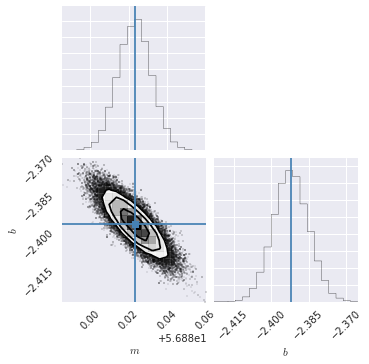

In [594]:
ndim, nwalkers = 2, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(df1.ExcU,df1.ExcExp, errUV))
sampler.run_mcmc(pos, 1000)
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
import corner
fig = corner.corner(samples, labels=["$m$", "$b$"],
                      truths=result["x"])

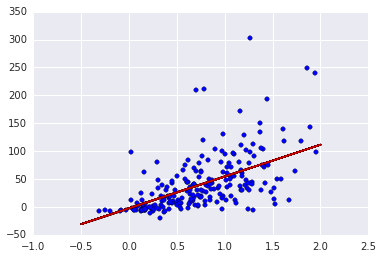

In [598]:
xl = np.array([-0.5, 2])
for m, b in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(xl, m*xl+b, color="k", alpha=0.1)
plt.plot(xl, m_ml*xl+b_ml, color="r", lw=2, alpha=0.8)
#plt.errorbar(df1.ExcU,df1.ExcExp, yerr= errUV, fmt=".k")
plt.scatter(df1.ExcU,df1.ExcExp)

In [222]:
def kde_sklearn2d(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x)
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid)
    return np.exp(log_pdf)

<matplotlib.contour.QuadContourSet instance at 0x7f76d6d6a560>

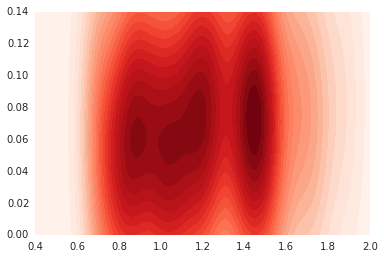

In [223]:
kde2d=kde_sklearn2d(np.vstack([x,y]).T, xy, bandwidth=0.07).reshape(X.shape)
levels = np.linspace(0, kde2d.max(), 25)
plt.contourf(X, Y, kde2d, levels=levels, cmap=plt.cm.Reds)

# 